## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

This report titled **ACT REPORT** is a summary to communicate the insights and visualizations prodcued from my wrangled data. In this report, I will give an insights into the steps I followed to produce the insight and visualization needed for this project. 

To work on this project, I worked on three sets of datasets. These datasets are:

1. *twitter_archive_enhanced.csv*: This dataset was provided by Udacity. The dataset contains *2356 rows and 17 columns*. The columns contains information about each line of tweets.


2. *image-predictions.tsv*: This dataset was also provided by Udacity but hosted on its server. The dataset was propgrammatically downloaded using the request library of python. The dataset contains *2057 rows and 12 columns*. The columns contains information about the prediction of the images in the tweets contained in *twitter_archive_enhanced* datasets.


3. *twitter_json.txt*: This dataset is supposed to be scrapped from Twitter using the tweepy API but I could not as I do not have the elevated access to Twitter Developer account as at the time of doing the project. I used the already provided dataset by Udacity and extracted a dataset containing *2354 rows and 3 columns*. The columns contains information about the retweet and favourite counts of the tweets contained in *twitter_archive_enhanced* datasets.


After assessing the three datasets, I found 9 quality issues and 2 tidiness issues. These issues were worked on and cleaned up during the data cleaning session using various pandas functions. The cleaned datasets were merged into a single datasets for further analysis to be carried on it. The resultant single dataset from the merger is named *twitter_archived_master_csv file. 


#### ANALYSIS OF THE FINAL DATASET

To analyse the single and final dataset, the following steps were followed:


1. The needed dataset was imported into the jupyter notebook using the the *pd.read_csv('file_name')* pandas method


2. Next, the *df.columns* pandas method was used to call the columns in the dataset


3. *df.describe()* pandas method was used to get the descriptive statistics of the datasets


4. The percentage of the dogs whose stages were not stated was gotten by dividing the value_counts by the shape and multiplying by 100


5. Tweet with highest retweet counts, least retweet counts, highest likes and lowest likes were gotten using the *pd.nlargest()* and *pd.nsmallest()*


6. The visualization of the most popular dog stage and distribution of images per tweet was gotten using the sns.countplot() seaborn method


The codes used in the analysis above and their result are shown below:

In [1]:
# importing the merged dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df=pd.read_csv('twitter_archive_master.csv')

In [2]:
# Calling the columns in the dataset

df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dogstage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_cnt', 'fav_cnt'],
      dtype='object')

In [3]:
# Getting the Descriptive Statistics summary

df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_cnt,fav_cnt
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.532096,1.203109,0.593992,0.134398,0.060165,2766.753260,8895.725677
std,6.747816e+16,41.497718,7.320710,0.560777,0.272090,0.100747,0.050971,4674.698447,12213.193181
min,6.660209e+17,0.000000,2.000000,1.000000,0.040000,0.000000,0.000000,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,1.000000,0.360000,0.050000,0.020000,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,1.000000,0.590000,0.120000,0.050000,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,1.000000,0.850000,0.197500,0.090000,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,0.490000,0.270000,79515.000000,132810.000000


In [4]:
# Getting the percentage of the dogs whose stage were not stated.

(df.dogstage.value_counts() / df.shape[0]) * 100

none              84.653962
pupper            10.180542
doggo              3.159478
puppo              1.103310
doggo, pupper      0.451354
floofer            0.351053
doggo, floofer     0.050150
doggo, puppo       0.050150
Name: dogstage, dtype: float64

In [5]:
# Getting the most retweeted tweet

df.nlargest(1, columns='retweet_cnt', keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
775,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,...,0.83,True,ice_bear,0.04,False,whippet,0.02,True,79515,131075


In [6]:
# Getting the least retweeted tweet

df.nsmallest(1, columns='retweet_cnt', keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
1977,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,none,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,...,0.3,True,newfoundland,0.15,True,borzoi,0.13,True,16,81


In [7]:
# Getting the most favourited tweet

df.nlargest(1, columns='fav_cnt', keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
309,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,0.2,True,labrador_retriever,0.16,True,irish_terrier,0.07,True,48265,132810


In [8]:
# Getting the least favourited tweet

df.nsmallest(1, columns='fav_cnt', keep='first')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_cnt,fav_cnt
1977,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,none,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,...,0.3,True,newfoundland,0.15,True,borzoi,0.13,True,16,81


In [9]:
# Percentage of unnamed dogs

(df.name.value_counts() / df.shape[0]) * 100

None         32.296891
Charlie       0.551655
Cooper        0.501505
Lucy          0.501505
Oliver        0.501505
Tucker        0.451354
Penny         0.451354
Sadie         0.401204
Winston       0.401204
Daisy         0.351053
Toby          0.351053
Lola          0.351053
Jax           0.300903
Stanley       0.300903
Bo            0.300903
Bella         0.300903
Koda          0.300903
Dave          0.250752
Leo           0.250752
Chester       0.250752
Oscar         0.250752
Bailey        0.250752
Buddy         0.250752
Louis         0.250752
Rusty         0.250752
Milo          0.250752
Scout         0.250752
Maggie        0.200602
Phil          0.200602
Brody         0.200602
               ...    
Samsom        0.050150
Kenny         0.050150
Jo            0.050150
Anthony       0.050150
Taco          0.050150
Canela        0.050150
Horace        0.050150
Venti         0.050150
Evy           0.050150
Huxley        0.050150
Cedrick       0.050150
Lenox         0.050150
Ron        

The insight drawn from the above analysis are:

1. The percentage of the dogs that their stage was not stated is **_84.65%_**. This means that **1688** dogs do not have their stage stated


2. The most retweeted tweet is the tweet with tweet ID *744234799360020481* created on *2016-06-18 18:26:18* with a retweet count of **_79515_** 


3. The least retweeted tweet is the tweet with tweet ID *666102155909144576* created on *2015-11-16 03:55:04* with a retweet count of **_16_**


4. The most favourited tweet is the the tweet with the tweet ID *822872901745569793* created on *2017-01-21 18:28:02* with favourite count of **_132810_**


5. The least favourited tweet is the tweet with the tweet ID *666102155909144576* created on *2015-11-16 03:55:04* with a  favourite count of **_81_**. **Coincidentally, the least retweeted tweet is also the least favourited tweet**


6. The percentage of the dogs that were unnamed is **_32.29%_**. This means that **644** dogs are unnamed.

#### Visualization

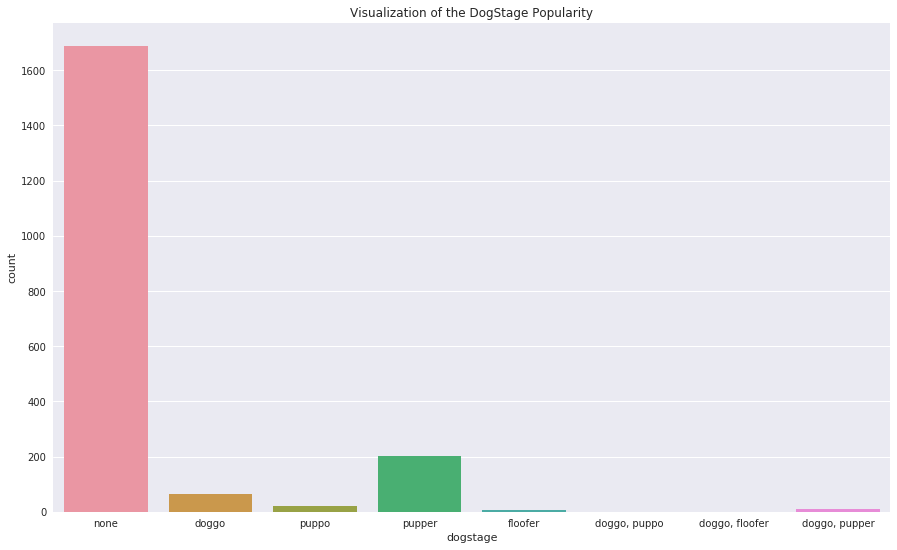

In [10]:
# which dogstage was most popular. ignore the result of the unnamed stage

sns.set(rc={'figure.figsize':(15, 9)})
sns.countplot(df.dogstage)
plt.title('Visualization of the DogStage Popularity')
plt.show()

#### Observation:

From the plot above, it can shown that **pupper** is the most popular dog stage in the dataset,followed by **doggo**

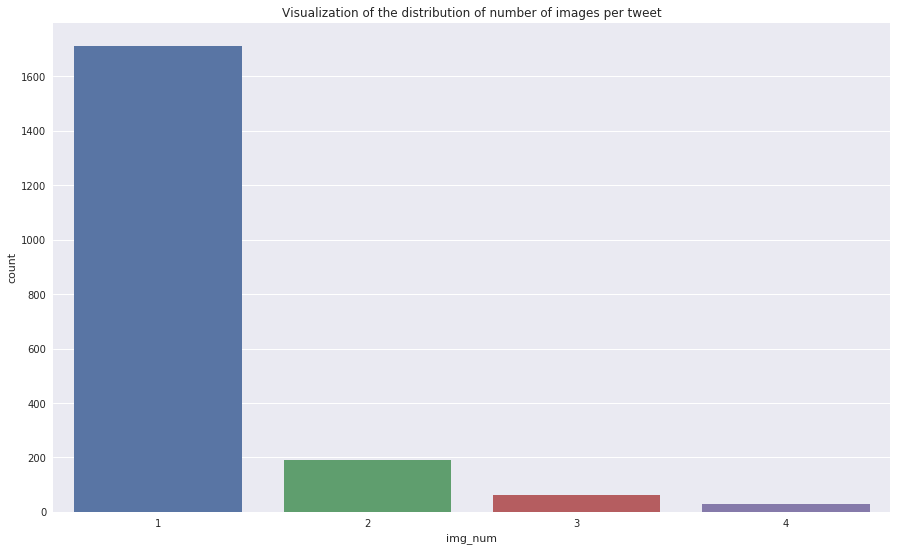

In [11]:
# What is the distribution of the number of images per tweet

sns.set(rc={'figure.figsize':(15, 9)})
sns.countplot(df.img_num)
plt.title('Visualization of the distribution of number of images per tweet')
plt.show()

#### Observation:
From the plot above, it can be shown that most tweet posted one image of their dogs